In [1]:
%%system
rm /scratch/ors -r
mkdir /scratch/ors
mkdir /scratch/ors/clr
mkdir /scratch/ors/dmg
cp ~/ors-project/data.tar.gz /scratch/ors
tar -xzvf /scratch/ors/data.tar.gz --directory /scratch/ors/
mv /scratch/ors/patches_256_v2 /scratch/ors/clr

["rm: cannot remove '/scratch/ors': No such file or directory",
 'patches_256_v2/',
 'patches_256_v2/47241882b3ec18350d5cf9f2b2ae7126.png',
 'patches_256_v2/f3bc77c7c77490d57feb757311ec78d0.png',
 'patches_256_v2/853c1077ca1750b4a4f13fc5bf49c0d1.png',
 'patches_256_v2/271b8741f4669704c795e04c8dc054b9.png',
 'patches_256_v2/33e98642af577a500dffd3936629ebe7.png',
 'patches_256_v2/44a924d539458dd0c490340ab9a611c4.png',
 'patches_256_v2/271b38b5c8419709160b5365bee967a5.png',
 'patches_256_v2/8d899ea6c7ccc62206e4243b8ab40fbe.png',
 'patches_256_v2/ecf50e585ecbe7a69a26807143e56c4c.png',
 'patches_256_v2/4f770737e533fefeb5e02d8010dbfad4.png',
 'patches_256_v2/dba15f7ceea4841b2ec46045d6d6b71c.png',
 'patches_256_v2/5fb27c8713f6c4d03814ac853ff47acf.png',
 'patches_256_v2/77a70f7a45892ec3cfb60138621567ee.png',
 'patches_256_v2/23a476f783cc6effd207ae81926dd8f2.png',
 'patches_256_v2/4c061e4b40febe21e4e70b6b7f861790.png',
 'patches_256_v2/b366346cb994faf4e6a562dab306cf02.png',
 'patches_256_v2/c71

In [9]:
!mv /scratch/ors/clr/patches_256_v2/* /scratch/ors/clr
!rm -r /scratch/ors/clr/patches_256_v2/

In [10]:
!ls /scratch/ors/clr

00023ec2292af4e8377a1c7f859898e3.png  82168815a3e0ae62e696bc05cb1a6852.png
00132fa4007697850da714e308e46dde.png  8217ed7215a11c9003d94bfb63f46b33.png
001bebba9d821660d75d352f6b737f6d.png  821883eefd8a5c7902b39d9ce0e11c41.png
0026235bdf9838a0fc14f7380cc8e7dd.png  8222e1b3ef90d4515bc29d7bfa9a339e.png
002ac9e9c6de81351486ec4af9849750.png  82245cb3247326e50b7f6d8a0f23b713.png
00326389efe8311358c57842c4ed3ccd.png  822677c002a60e34ae4686f6fccc7d15.png
0033dfd8e667d6981cc39e1e7f69b01c.png  822a9aeca245046d92cc63614fd63304.png
003427c471e0dcd9b1b2388816e0b571.png  822eac8fa02f7e6f429ab77e662de974.png
003490ee98e3e79351f61b3a253c22a2.png  822f6a519f8b3c80120860d37d3a4740.png
00368f5eecd54a95fa033df9deff7b3d.png  8230c179e4b01d521208fea9f739121f.png
003b2ec6d091e8c742483508972eb92b.png  8234335c260bf6b4c77bbf2a80c49d10.png
003c9ab4e877baf0617aef2d4c37812e.png  82376798277c746bcbc919eaa5a2229f.png
004664e8a8034930f2cac7b8655a5197.png  823b1bc81a595e5ac9df54f4ab263aac.png
004acfb28935794450863ab4f

53a814c0388f9c022821a6d2909cc9a7.png  d4642ad856ec01f6196064728c0f139c.png
53a9497ad51809c83160495dd9069816.png  d465aacd3358e7072f24faa9673080cb.png
53b134493d65ffc279066d2bfa7a8edd.png  d468b4d5a176a258d7afa87dea4dc6a4.png
53b7402b32dbda09e2bb3f4b2884f896.png  d46977d3cb42c5974429dd34988ae819.png
53b99abfd38c9c7e8bfea7aa73fc6753.png  d46b911a951c75fe09b0b8a83a70a65e.png
53bc41cec1967dec95a939b1cd0880db.png  d46c48fc9768e4d9eb0e2e4142cdea17.png
53bef71314955329b2903517e6918274.png  d46de89e0aa9b001995bb178719f0189.png
53c09969393d67b0c857953a19e379c9.png  d47144240967f43a58d0927fc763c83c.png
53c1f3148d9636c122a9703b787fdc89.png  d475e0a929990e7e067a708bfa413192.png
53c655c45520e914b0d3ad9161bff641.png  d477158196d54f4874bafd4a9fd04d4a.png
53c70ac84e86bd932bdc85c7723b62e9.png  d47b7ad8a43ccc673222617c6efc8949.png
53c8e55574d03bd7f309bbf99eb3c20f.png  d47e8f9f2e905ac04db0a1a102ead81a.png
53c8fddc3bec71c2b06c40ff637508fd.png  d4803ea326931f2be96a6e2ee993c288.png
53c9e99383d4abed14df95de8

In [2]:
import numpy as np
from PIL import Image, ImageDraw
from random import randint
import random
import matplotlib.pyplot as plt
from pathlib import Path
from fastai.vision.all import *

In [3]:
path = Path("/scratch/ors/")
path_clear = path/"clr"
path_damaged = path/"dmg"

In [4]:
LINE_WIDTH = 2
STRIP_IMAGE_SIZE = 512

In [5]:
def damage_image(image_path):    
    stripes_base = Image.new("RGB", (STRIP_IMAGE_SIZE, STRIP_IMAGE_SIZE), (255, 255, 255))
    stripes = ImageDraw.Draw(stripes_base)

    
    color = [0, 0, 0]
#     color = [255, 255, 255]
#     color[random.randint(0, 2)] = 0
    color = tuple(color)

    for y in range(int(1.1 * LINE_WIDTH), int(STRIP_IMAGE_SIZE - 0.1 * LINE_WIDTH), 20):
        stripes.line([0, y, STRIP_IMAGE_SIZE, y], width=LINE_WIDTH, fill=color)
    
    damage_lines = stripes_base.rotate(random.randint(0, 360))
    damage_lines = damage_lines.crop(((STRIP_IMAGE_SIZE - 256)/2, (STRIP_IMAGE_SIZE - 256)/2, (STRIP_IMAGE_SIZE + 256)/2, (STRIP_IMAGE_SIZE + 256)/2, ))
    damage_lines = np.array(damage_lines) / 255
    
    img = Image.open(image_path)
    img = np.array(img) / 255
    damaged_img = img * damage_lines
    damaged_img = np.uint8(damaged_img * 255)
    damaged_img = Image.fromarray(damaged_img)
    damaged_img.save(path_damaged/image_path.name)

In [6]:
path = Path("/scratch/ors/")
path_three_band = path/"clr_three_band"
path_clear = path/"clr"
path_damaged = path/"dmg"

In [11]:
!mv /scratch/ors/clr /scratch/ors/clr_three_band
!rm -r /scratch/ors/dmg
!mkdir /scratch/ors/clr /scratch/ors/dmg 

In [12]:
def damage_image(image_path):  
    img = Image.open(image_path)
    img = np.array(img) / 255
    
    for i in range(img.shape[-1]):
        image_name = image_path.name[:-len(".png")] + "_" + str(i) + ".png"
        band = img[:, :, i]
        
        stripes_base = Image.new("L", (STRIP_IMAGE_SIZE, STRIP_IMAGE_SIZE), (255))
        stripes = ImageDraw.Draw(stripes_base)

        color = "BLACK"

        for y in range(int(1.1 * LINE_WIDTH), int(STRIP_IMAGE_SIZE - 0.1 * LINE_WIDTH), 20):
            stripes.line([0, y, STRIP_IMAGE_SIZE, y], width=LINE_WIDTH, fill=color)

        damage_lines = stripes_base.rotate(random.randint(0, 360))
        damage_lines = damage_lines.crop(((STRIP_IMAGE_SIZE - 256)/2, (STRIP_IMAGE_SIZE - 256)/2, (STRIP_IMAGE_SIZE + 256)/2, (STRIP_IMAGE_SIZE + 256)/2, ))
        damage_lines = np.array(damage_lines) / 255
    
        damaged_band = band * damage_lines
        
        damaged_band = np.uint8(damaged_band * 255)
        damaged_band = Image.fromarray(damaged_band)
        damaged_band.save(path_damaged/image_name)
        
        band = np.uint8(band * 255)
        band = Image.fromarray(band)
        band.save(path_clear/image_name)

In [93]:
damage_image(path_three_band/"4444f764fb25a7041fb9c883dcef3dbb.png")

In [13]:
parallel(damage_image, path_three_band.ls(), n_workers=8, progress=True)

(#12900) [None,None,None,None,None,None,None,None,None,None...]

In [14]:
clear_image = Image.open("/scratch/ors/clr_three_band/4444f764fb25a7041fb9c883dcef3dbb.png")
clear_image

In [15]:
clear_image_arr = np.array(clear_image)
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
for i in range(len(axs)):
    axs[i].imshow(clear_image_arr[:, :, i], 'gray')
    axs[i].axis('off')

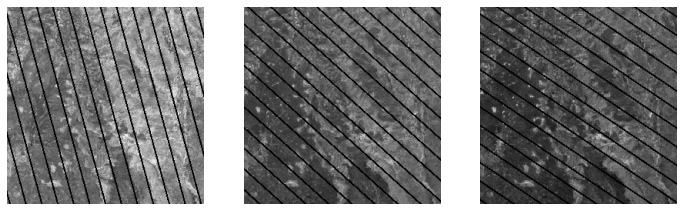

In [17]:
# damaged_image_arr = np.array(damaged_image)
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
for i in range(len(axs)):
    axs[i].imshow(plt.imread(path_damaged/f"4444f764fb25a7041fb9c883dcef3dbb_{i}.png"), 'gray')
    axs[i].axis('off')

In [18]:
dblock = DataBlock(blocks=(ImageBlock, ImageBlock),
                  get_items=get_image_files,
                  get_y=lambda x: path_clear/x.name,
                  splitter=RandomSplitter(),
                  item_tfms=Resize(224),
                  batch_tfms=[*aug_transforms(max_zoom=2.),
                             Normalize.from_stats(*imagenet_stats)])

In [19]:
dls = dblock.dataloaders(path_damaged, bs=8)

/home2/s.ranjan/miniconda3/envs/ors/lib/python3.6/site-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


In [20]:
dls_gen = dls
dls_gen.c = 3

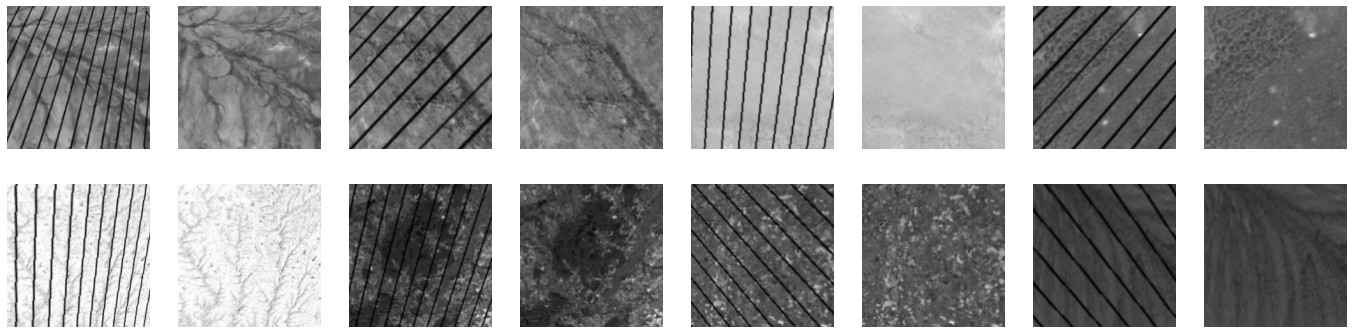

In [21]:
dls_gen.show_batch()

In [22]:
wd, y_range, loss_gen = 1e-3, (-3., 3.), MSELossFlat()

In [23]:
bbone = resnet34

In [24]:
def create_gen_learner():
    return unet_learner(dls_gen, bbone, loss_func=loss_gen)

In [25]:
learn_gen = create_gen_learner()

In [26]:
learn_gen.load("image_restoration_single_band_process")

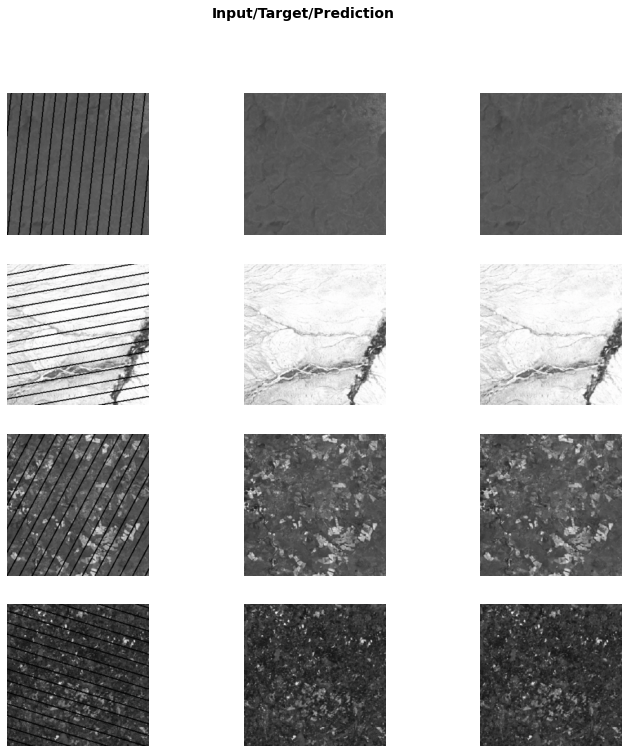

In [27]:
learn_gen.show_results(max_n=4, figsize=(12,12))

In [39]:
!ls landsat-sample/landsat-7-data/

band-1.png  band-2.png	band-3.png  band-4.png	band-5.png  band-7.png


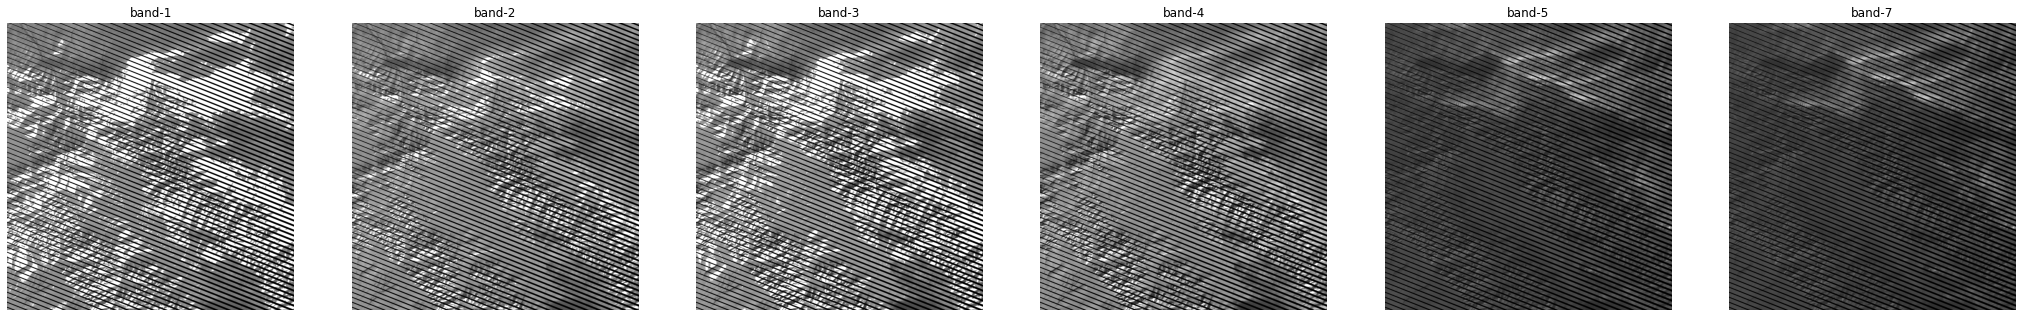

In [45]:
fig, axs = plt.subplots(1, 6, figsize=(36, 6))

c = 0
for i in range(1, 8):
    if i == 6:
        continue
    file_path = f"landsat-sample/landsat-7-data/band-{i}.png"
    axs[c].imshow(plt.imread(file_path), 'gray')
    axs[c].set_title(f"band-{i}")

    
    axs[c].axis('off')
    c += 1

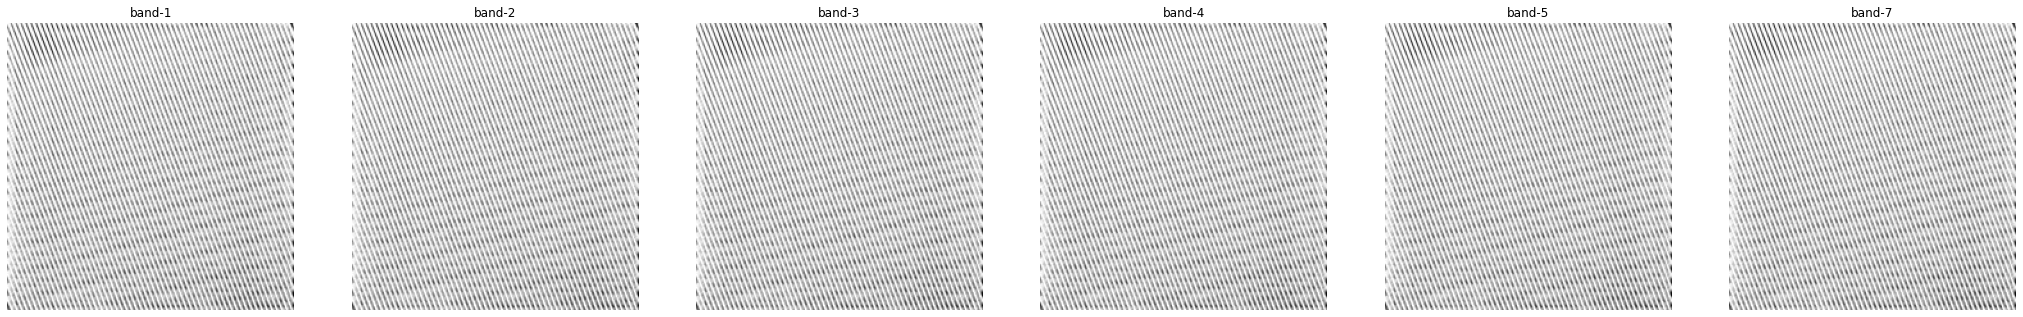

In [53]:
fig, axs = plt.subplots(1, 6, figsize=(36, 6))

c = 0
for i in range(1, 8):
    if i == 6:
        continue
    file_path = f"landsat-sample/landsat-7-data/band-{i}.png"
    model_pred = learn_gen.predict(file_path)
    
    axs[c].imshow(model_pred[0].numpy().T.mean(axis=-1), 'gray')
    axs[c].set_title(f"band-{i}")

    
    axs[c].axis('off')
    c += 1

In [117]:
repaired_image_arr = np.zeros((224, 224, 3))
for i in range(3):
    model_pred = learn_gen.predict(path_damaged/f"4444f764fb25a7041fb9c883dcef3dbb_{i}.png")
    repaired_image_arr[:, :, i] = model_pred[0].numpy().T.mean(axis=-1)

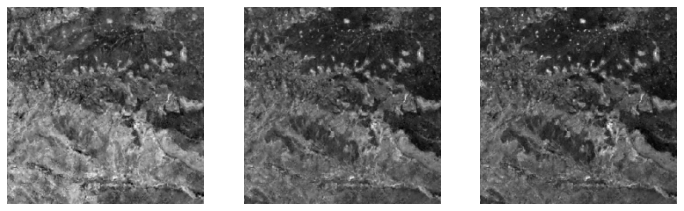

In [173]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
for i in range(len(axs)):
    axs[i].imshow(repaired_image_arr[:, :, i], 'gray')
    axs[i].axis('off')

# Independent Damage

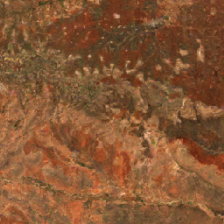

In [115]:
repaired_image = Image.fromarray(repaired_image_arr.astype('uint8'))
repaired_image

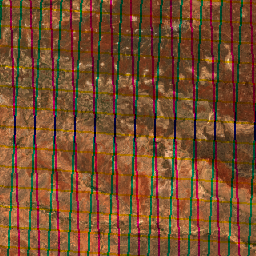

In [126]:
combined_damaged_image = Image.fromarray((np.stack([
    plt.imread(path_damaged/f"4444f764fb25a7041fb9c883dcef3dbb_{0}.png"), 
    plt.imread(path_damaged/f"4444f764fb25a7041fb9c883dcef3dbb_{1}.png"),
    plt.imread(path_damaged/f"4444f764fb25a7041fb9c883dcef3dbb_{2}.png")
]).T * 255).astype('uint8'))
combined_damaged_image

# Same Damage

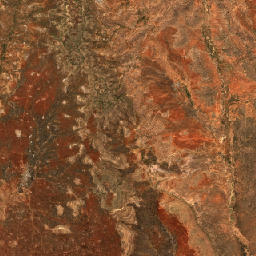

In [155]:
clear_image = Image.open("/scratch/ors/clr_three_band/4444f764fb25a7041fb9c883dcef3dbb.png")
clear_image

In [157]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
for i in range(len(axs)):
    axs[i].imshow(plt.imread(path_clear/f"4444f764fb25a7041fb9c883dcef3dbb_{i}.png"), 'gray')
    axs[i].axis('off')

In [162]:
# First run the cell of the original damage image
damage_image(path_three_band/"4444f764fb25a7041fb9c883dcef3dbb.png")

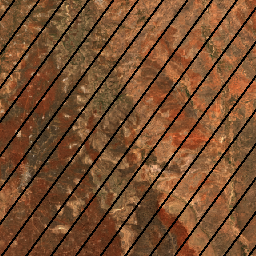

In [163]:
damaged_image = Image.open("/scratch/ors/dmg/4444f764fb25a7041fb9c883dcef3dbb.png")
damaged_image

In [169]:
damaged_image_arr = np.array(damaged_image)
for i in range(3):
    band = Image.fromarray(damaged_image_arr[:, :, i])
    band.save(path_damaged/f"4444f764fb25a7041fb9c883dcef3dbb_{i}.png")
#     plt.imsave(path_damaged/f"4444f764fb25a7041fb9c883dcef3dbb_{i}.png", damaged_image_arr[:, :, i])

In [161]:
# Reverse Above Action
# First run the cell of single band damage
damage_image(path_three_band/"4444f764fb25a7041fb9c883dcef3dbb.png")

In [170]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
for i in range(len(axs)):
    axs[i].imshow(plt.imread(path_damaged/f"4444f764fb25a7041fb9c883dcef3dbb_{i}.png"), 'gray')
    axs[i].axis('off')

In [171]:
repaired_image_arr = np.zeros((224, 224, 3))
for i in range(3):
    model_pred = learn_gen.predict(path_damaged/f"4444f764fb25a7041fb9c883dcef3dbb_{i}.png")
    repaired_image_arr[:, :, i] = model_pred[0].numpy().T.mean(axis=-1)
    
repaired_image = Image.fromarray(repaired_image_arr.astype('uint8'))
repaired_image

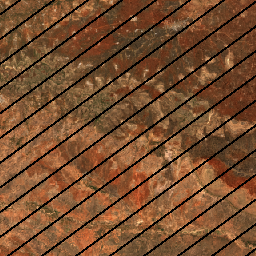

In [172]:
combined_damaged_image = Image.fromarray((np.stack([
    plt.imread(path_damaged/f"4444f764fb25a7041fb9c883dcef3dbb_{0}.png"), 
    plt.imread(path_damaged/f"4444f764fb25a7041fb9c883dcef3dbb_{1}.png"),
    plt.imread(path_damaged/f"4444f764fb25a7041fb9c883dcef3dbb_{2}.png")
]).T * 255).astype('uint8'))
combined_damaged_image